# Proyek Klasifikasi Gambar: Cat or Dog
- **Nama:**
Novandra Aria Budi Raspati
- **Email:** novankecebadai@gmail.com
- **ID Dicoding:** novan_dra_bvFT

## Import Semua Packages/Library yang Digunakan

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import os
import numpy as np
from google.colab import drive

In [4]:
!pipreqs /content/ --force

INFO: Not scanning for jupyter notebooks.
INFO: Successfully saved requirements file in /content/requirements.txt


In [6]:
!pip freeze > requirements.txt

In [60]:
!pip install tensorflowjs
!pip install pipreqs


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.3/798.3 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 45.8 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=0d55f1653e244046bb3cfe6e1da946917c67c48e638f1930cc64d44b407561ff
  Stored in directory: /root/.cache/pip/wheels/1a/b0/8c/4b75c4116c31f83c8f9f047231251e13cc74481cca4a78a9ce
Successfully built docopt
  Attempting uninstall: ipython
    Found existing installation: ipython 7.34.0
    Uninstalling ipython-7.34.0:
      Successfully uninstalled ipython-7.34.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipython==7.34.0, but you have ipython 8.12.3 which is incompatible.


In [19]:
drive.mount('/content/drive')

SyntaxError: incomplete input (<ipython-input-19-efed47de43eb>, line 3)

In [21]:
tf.__version__

'2.18.0'

## Data Preparation

### Data Loading

In [29]:
drive.mount('/content/drive')
dataset_path = '/content/sample_data/dataset/train'

In [30]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # otomatis split val dari train
)
test_datagen = ImageDataGenerator(rescale=1./255)

### Data Preprocessing

#### Split Dataset

In [33]:
train_data = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)


Found 6400 images belonging to 2 classes.


In [35]:
test_datagen = ImageDataGenerator(rescale=1./255)

# 3. Train data
train_data = train_datagen.flow_from_directory(
    dataset_path ,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# 4. Validation data
val_data = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# 5. Test data
test_data = test_datagen.flow_from_directory(
    dataset_path ,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

Found 6400 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.
Found 8000 images belonging to 2 classes.


## Modelling

In [36]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(train_data.num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.2)
]

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=30,
    callbacks=callbacks
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 55s 227ms/step - accuracy: 0.5755 - loss: 2.9272 - val_accuracy: 0.5013 - val_loss: 2.5130 - learning_rate: 0.0010
Epoch 2/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 43s 216ms/step - accuracy: 0.6688 - loss: 0.6163 - val_accuracy: 0.5869 - val_loss: 0.9014 - learning_rate: 0.0010
Epoch 3/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 82s 217ms/step - accuracy: 0.7002 - loss: 0.5909 - val_accuracy: 0.6881 - val_loss: 0.5955 - learning_rate: 0.0010
Epoch 4/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 42s 211ms/step - accuracy: 0.7173 - loss: 0.5661 - val_accuracy: 0.6200 - val_loss: 0.6608 - learning_rate: 0.0010
Epoch 5/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 43s 214ms/step - accuracy: 0.7026 - loss: 0.5771 - val_accuracy: 0.6531 - val_loss: 0.6338 - learning_rate: 0.0010
Epoch 6/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 43s 214ms/step - accuracy: 0.7409 - loss: 0.5271 - val_accuracy: 0.7200 - val_loss: 0.5270 - learning_rate: 0.0010
Epoch 7/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 45s 224ms/step - accuracy: 0.7

## Evaluasi dan Visualisasi

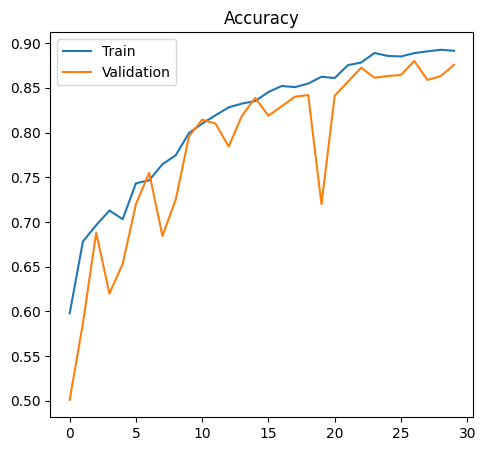

In [38]:
# Plot Accuracy & Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.legend()

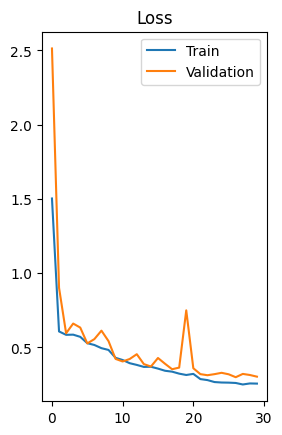

In [39]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss')
plt.legend()

plt.show()

In [40]:
# Evaluasi di test set
loss, acc = model.evaluate(test_data)
print(f"Test Accuracy: {acc*100:.2f}%")

250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 50ms/step - accuracy: 0.9093 - loss: 0.2233
Test Accuracy: 90.43%


## Konversi Model

In [46]:
model.export("saved_model")

Saved artifact at 'saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  132859320805200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132859320806544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132859320808848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132859320810192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132859320810000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132859320807888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132859320810960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132859320811344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132859296253520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132859296253904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132859296252368: Te

In [47]:
converter = tf.lite.TFLiteConverter.from_saved_model("saved_model")
tflite_model = converter.convert()
with open("model.tflite", "wb") as f:
    f.write(tflite_model)


In [50]:
!pip install tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 3.31.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.


In [51]:
!tensorflowjs_converter --input_format=tf_saved_model saved_model model_tfjs/

2025-04-11 18:31:14.253460: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744396274.297191   21104 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744396274.308904   21104 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
2025-04-11 18:31:26.599766: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
I0000 00:00:1744396286.599971   21104 gpu_device.cc:2022] Created device /job:localhost/replica:0/task

In [53]:
tflite_dir = "tflite"
os.makedirs(tflite_dir, exist_ok=True)

labels = ["cat", "dog"]  # Ganti sesuai label dataset kamu
with open(os.path.join(tflite_dir, "label.txt"), "w") as f:
    for label in labels:
        f.write(label + "\n")

print("✅ Label.txt disimpan.")

✅ Label.txt disimpan.


## Inference (Optional)

In [7]:
import numpy as np
#    Load TFLite model
interpreter = tf.lite.Interpreter(model_path="tflite/model.tflite")
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

#    Preprocess gambar
def load_and_preprocess(image_path, target_size):
    img = Image.open(image_path).convert("RGB")
    img = img.resize(target_size)
    img_array = np.array(img).astype(np.float32) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Tambah batch dimensi
    return img_array, img

# Lakukan Inference
image_path = "sample_data/dataset/single_prediction/cat_or_dog_1.jpg"  # Ganti path sesuai
input_shape = input_details[0]['shape']
input_size = (input_shape[1], input_shape[2])

img_array, img_display = load_and_preprocess(image_path, input_size)

interpreter.set_tensor(input_details[0]['index'], img_array)
interpreter.invoke()

output = interpreter.get_tensor(output_details[0]['index'])
pred_class = np.argmax(output)

#  Load label
with open("tflite/label.txt", "r") as f:
    labels = [line.strip() for line in f.readlines()]

#    Tampilkan hasil
plt.imshow(img_display)
plt.title(f"Prediksi: {labels[pred_class]} ({output[0][pred_class]:.2f})")
plt.axis("off")
plt.show()

NameError: name 'Image' is not defined